**Importing all the neccessary libraries and configuring the right settings needed to plot propperly**

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn-v0_8")
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (16, 8)

**Reading trial data and preprocessing the data**

In [2]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
print(mtcars.__doc__)

.. container::

   ====== ===============
   mtcars R Documentation
   ====== ===============

   .. rubric:: Motor Trend Car Road Tests
      :name: mtcars

   .. rubric:: Description
      :name: description

   The data was extracted from the 1974 *Motor Trend* US magazine, and
   comprises fuel consumption and 10 aspects of automobile design and
   performance for 32 automobiles (1973–74 models).

   .. rubric:: Usage
      :name: usage

   ::

      mtcars

   .. rubric:: Format
      :name: format

   A data frame with 32 observations on 11 (numeric) variables.

   ===== ==== ========================================
   [, 1] mpg  Miles/(US) gallon
   [, 2] cyl  Number of cylinders
   [, 3] disp Displacement (cu.in.)
   [, 4] hp   Gross horsepower
   [, 5] drat Rear axle ratio
   [, 6] wt   Weight (1000 lbs)
   [, 7] qsec 1/4 mile time
   [, 8] vs   Engine (0 = V-shaped, 1 = straight)
   [, 9] am   Transmission (0 = automatic, 1 = manual)
   [,10] gear Number of forward gears
   [

**Reading an preprocessing the data.**

In [ ]:
df = pd.read_csv('../../data/final/original_liv_data_per_neighbourhood.csv')
df['moving_out'] = df['Vertrek']
df['moving_in'] = (df['Vestiging'] + df['Verhuizing binnen gridcel'] + df['Verhuizing']) / 3
df['liv'] = df['Livability index']

df.drop(['Livability index', 'Vestiging', 'Vertrek', 'Verhuizing binnen gridcel', 'Verhuizing'], axis=1, inplace=True)
df.head()

In [4]:
colors = []
max_value = 1
min_values = 256
for i in range(0, len(df)):
    r = int(np.random.random() * (max_value - min_values) + min_values)
    g = int(np.random.random() * (max_value - min_values) + min_values)
    b = int(np.random.random() * (max_value - min_values) + min_values)

    colors.append('#%02x%02x%02x' % (r, g, b))
len(colors)

56

**Plotting the data**

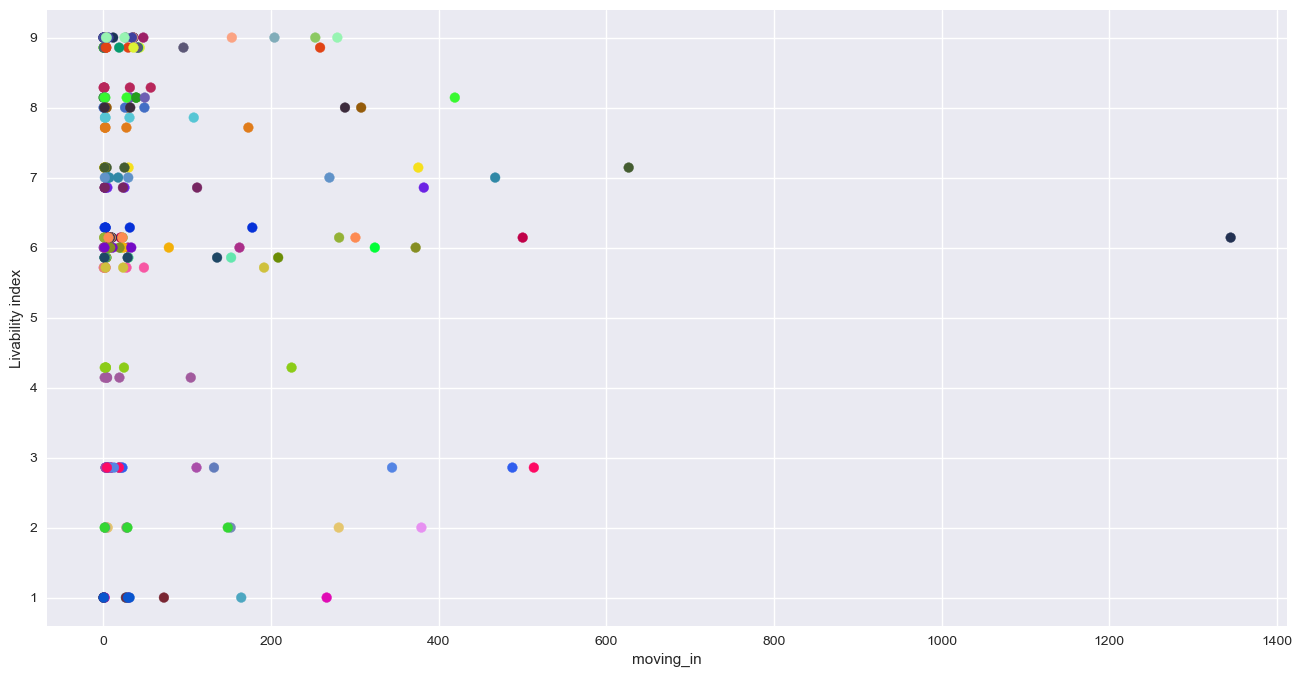

In [5]:
fig, ax = plt.subplots()

for idx, column in enumerate(df.columns[1:-1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)
    ax.set_ylabel("Livability index")
    ax.set_xlabel(column)
plt.show()

In [ ]:
neighbourhoods_encoded = pd.get_dummies(df)
neighbourhoods_encoded.columns = neighbourhoods_encoded.columns.str.replace(' ', '_')
neighbourhoods_encoded.columns = neighbourhoods_encoded.columns.str.replace('-', '_')
neighbourhoods_encoded.head()

### Experiment 1: Creating a 'BaseLine' Simple Linear Regression Model
##### Generating the formula

In [7]:
formula = neighbourhoods_encoded.columns[5] + ' ~ '

for idx, column in enumerate(neighbourhoods_encoded.columns):
    if idx != 5:
        formula += column + ' + '
formula = formula[:-3]
formula

'liv ~ green_score + GeregistreerdeOverlast_1 + GeregistreerdeMisdrijven_1 + moving_out + moving_in + Neighbourhoods_Bavel + Neighbourhoods_Belcrum + Neighbourhoods_Biesdonk + Neighbourhoods_Blauwe_Kei + Neighbourhoods_Boeimeer + Neighbourhoods_Brabantpark + Neighbourhoods_Buitengebied_Bavel + Neighbourhoods_Buitengebied_Prinsenbeek + Neighbourhoods_Buitengebied_Teteringen + Neighbourhoods_Buitengebied_Ulvenhout + Neighbourhoods_Chassé + Neighbourhoods_City + Neighbourhoods_Doornbos_Linie + Neighbourhoods_Effen_Rith + Neighbourhoods_Emer + Neighbourhoods_Fellenoord + Neighbourhoods_Gageldonk + Neighbourhoods_Geeren_noord + Neighbourhoods_Geeren_zuid + Neighbourhoods_Ginneken + Neighbourhoods_Haagpoort + Neighbourhoods_Hagebeemd + Neighbourhoods_Hazeldonk + Neighbourhoods_Heilaar + Neighbourhoods_Heksenwiel + Neighbourhoods_Heusdenhout + Neighbourhoods_Heuvel + Neighbourhoods_Hoogeind + Neighbourhoods_Kesteren + Neighbourhoods_Kievitsloop + Neighbourhoods_Kroeten + Neighbourhoods_Krogte

**Training the model**

In [8]:
model_1 = smf.ols(formula=formula, data=neighbourhoods_encoded).fit()
model_1.summary()

c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    liv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                nan
Time:                        08:20:25   Log-Likelihood:                 1641.8
No. Observations:                  56   AIC:                            -3172.
Df Residuals:                       0   BIC:                            -3058.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.2508        inf          0        nan         nan         nan
green_score                                 0.1942        inf          0        nan         nan         nan
GeregistreerdeOverlast_1                   -0.2964        inf         -0        nan         nan         nan
GeregistreerdeMisdrijven_1                  0.0024        inf          0        nan         nan         nan
moving_out                                 -1.2406        inf         -0        nan         nan         nan
moving_in                                   1.9912        inf          0        nan         nan         nan
Neighbourhoods_Bavel                        0.4390        inf          0        nan         nan         nan
Neighbourhoods_Belcrum                      0.2942        inf          0        nan         nan         nan
Neighbourhoods_Biesdonk                    -3.2587        inf         -0        nan         nan         nan
Neighbourhoods_Blauwe_Kei                   1.3645        inf          0        nan         nan         nan
Neighbourhoods_Boeimeer                     1.8996        inf          0        nan         nan         nan
Neighbourhoods_Brabantpark                  1.9685        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Bavel          -0.2701        inf         -0        nan         nan         nan
Neighbourhoods_Buitengebied_Prinsenbeek     0.0746        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Teteringen      1.4254        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Ulvenhout       0.8188        inf          0        nan         nan         nan
Neighbourhoods_Chassé                       2.1217        inf          0        nan         nan         nan
Neighbourhoods_City                        -1.0146        inf         -0        nan         nan         nan
Neighbourhoods_Doornbos_Linie              -4.1043        inf         -0        nan         nan         nan
Neighbourhoods_Effen_Rith                   1.7331        inf          0        nan         nan         nan
Neighbourhoods_Emer                        -4.8494        inf         -0        nan         nan         nan
Neighbourhoods_Fellenoord                  -1.6077        inf         -0        nan         nan         nan
Neighbourhoods_Gageldonk                   -0.8878        inf         -0        nan         nan         nan
Neighbourhoods_Geeren_noord                -1.5298        inf         -0        nan         nan         nan
Neighbourhoods_Geeren_zuid                 -3.8672        inf         -0        nan         nan         nan
Neighbourhoods_Ginneken                     2.0127        i

**Visualizing the coefficients. The chart cannot be interpreted because the information is in 3 dimensions.**

0
-0.19424861149295927
-0.49068661762776233
-0.4930530683659377
-1.733656720579863


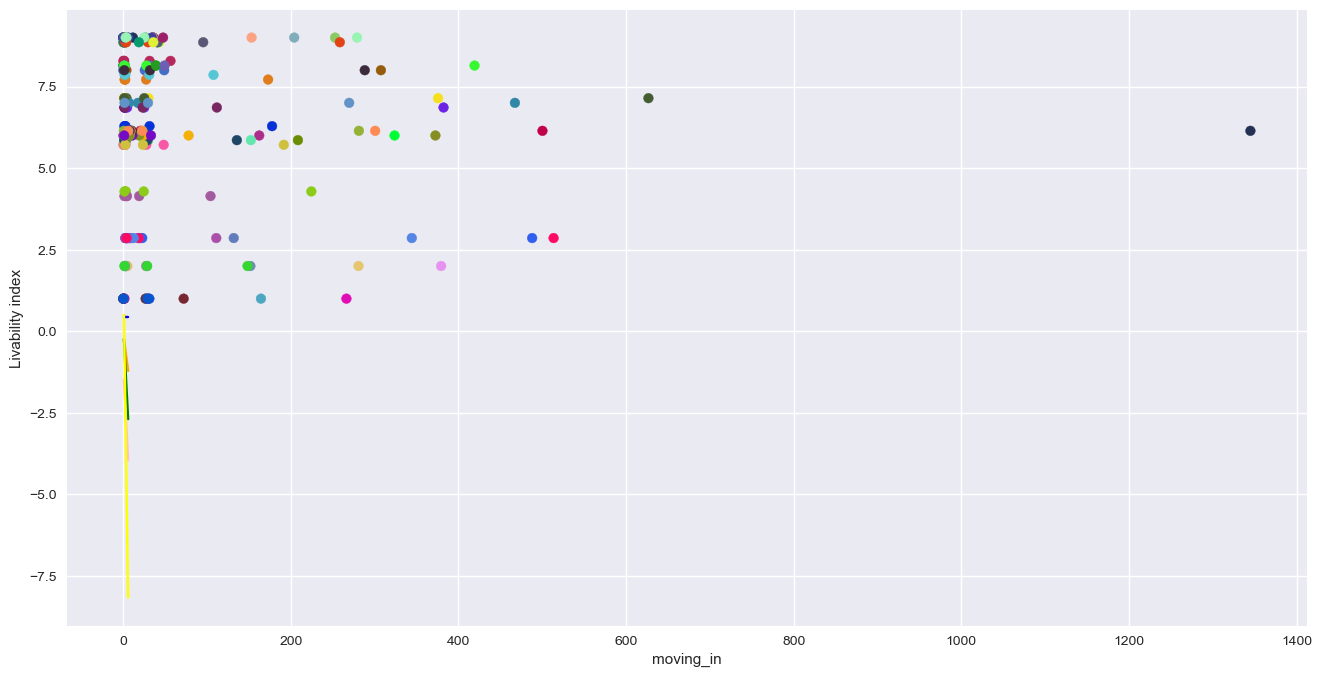

In [9]:
X = np.linspace(1, 6, num=5)
line_colors = ["blue", 'orange', 'green', 'pink', 'yellow']
params = model_1.params

sum = 0
fig, ax = plt.subplots()
for idx, column in enumerate(df.columns[1:-1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)
    ax.set_ylabel("Livability index")
    ax.set_xlabel(column)
    intercept = params[0]

    el = params[idx + 1]
    res = (intercept + el) + sum * X
    print(sum)
    sum += (abs(el) * -1)
    ax.plot(X, res, line_colors[idx])  # ax.plot(X, 0.4281 + 0.1895 * X, "blue")
# ax.plot(X, (0.4281 - 0.2887) - 0.1895 * X, "orange")
# ax.plot(X, (0.4281 + 0.0020) + (0.1895 - 0.2887) * X, "green")
# ax.plot(X, (0.4281 - 1.4426) + (0.0020 + 0.1895 - 0.2887) * X, "pink")
# ax.plot(X, (0.4281 + 2.2704) + (-1.4426 + 0.0020 + 0.1895 - 0.2887) * X, "yellow")
plt.show()

### Experiment 2: Training a Linear Regression with Interaction Terms Model
**Generating the formula**

In [10]:
formula = df.columns[-1] + ' ~ '

for idx, column in enumerate(df.columns[1:-1]):
    formula += column + ' + '

for idx, column in enumerate(df.columns[1:-1]):
    formula += column + ':'

for idx, column in enumerate(neighbourhoods_encoded.columns[6:]):
    if idx != 5:
        formula += column + ':'

formula = formula[:-1]
formula

'liv ~ green_score + GeregistreerdeOverlast_1 + GeregistreerdeMisdrijven_1 + moving_out + moving_in + green_score:GeregistreerdeOverlast_1:GeregistreerdeMisdrijven_1:moving_out:moving_in:Neighbourhoods_Bavel:Neighbourhoods_Belcrum:Neighbourhoods_Biesdonk:Neighbourhoods_Blauwe_Kei:Neighbourhoods_Boeimeer:Neighbourhoods_Buitengebied_Bavel:Neighbourhoods_Buitengebied_Prinsenbeek:Neighbourhoods_Buitengebied_Teteringen:Neighbourhoods_Buitengebied_Ulvenhout:Neighbourhoods_Chassé:Neighbourhoods_City:Neighbourhoods_Doornbos_Linie:Neighbourhoods_Effen_Rith:Neighbourhoods_Emer:Neighbourhoods_Fellenoord:Neighbourhoods_Gageldonk:Neighbourhoods_Geeren_noord:Neighbourhoods_Geeren_zuid:Neighbourhoods_Ginneken:Neighbourhoods_Haagpoort:Neighbourhoods_Hagebeemd:Neighbourhoods_Hazeldonk:Neighbourhoods_Heilaar:Neighbourhoods_Heksenwiel:Neighbourhoods_Heusdenhout:Neighbourhoods_Heuvel:Neighbourhoods_Hoogeind:Neighbourhoods_Kesteren:Neighbourhoods_Kievitsloop:Neighbourhoods_Kroeten:Neighbourhoods_Krogten:Ne

**Training the model.**

In [11]:
model_2 = smf.ols(formula=formula, data=neighbourhoods_encoded).fit()
model_2.summary()

c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    liv   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     5.174
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           0.000667
Time:                        08:20:26   Log-Likelihood:                -119.83
No. Observations:                  56   AIC:                             251.7
Df Residuals:                      50   BIC:                             263.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

**Visualizing the coefficients. The chart cannot be interpreted because the information is in 3 dimensions.**

0
-0.18952560809590163
-0.4782586743191391
-0.48026519995691735
-1.9228956449842902


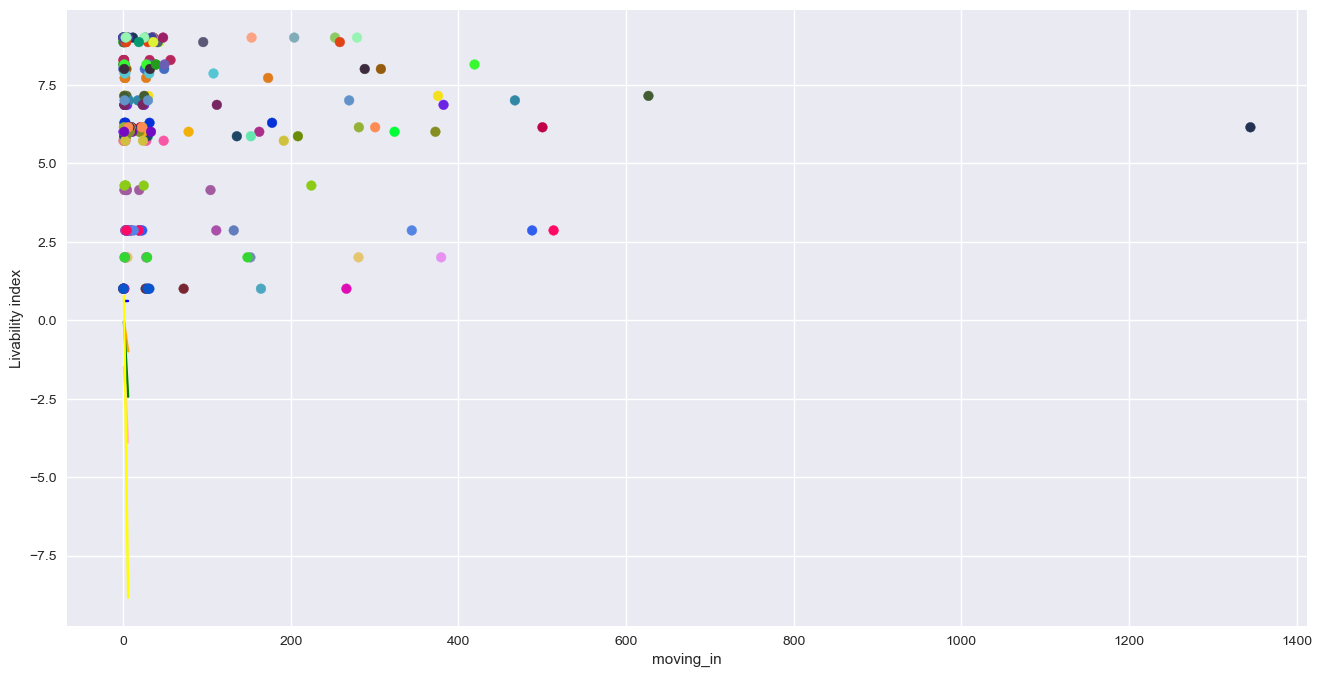

In [12]:
X = np.linspace(1, 6, num=5)
line_colors = ["blue", 'orange', 'green', 'pink', 'yellow', 'purple']
params = model_2.params

sum = 0
fig, ax = plt.subplots()
for idx, column in enumerate(df.columns[1:-1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)
    ax.set_ylabel("Livability index")
    ax.set_xlabel(column)
    intercept = params[0]
    el = params[idx + 1]
    res = (intercept + el) + sum * X
    print(sum)
    sum += (abs(el) * -1)
    ax.plot(X, res, line_colors[idx])
plt.show()

**Evaluation**

In [13]:
model_2.predict(neighbourhoods_encoded.iloc[:1])

0    6.610179
dtype: float64

In [ ]:
neighbourhoods_encoded.head()

In [15]:
model_1

In [16]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    liv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                nan
Time:                        08:20:27   Log-Likelihood:                 1641.8
No. Observations:                  56   AIC:                            -3172.
Df Residuals:                       0   BIC:                            -3058.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.2508        inf          0        nan         nan         nan
green_score                                 0.1942        inf          0        nan         nan         nan
GeregistreerdeOverlast_1                   -0.2964        inf         -0        nan         nan         nan
GeregistreerdeMisdrijven_1                  0.0024        inf          0        nan         nan         nan
moving_out                                 -1.2406        inf         -0        nan         nan         nan
moving_in                                   1.9912        inf          0        nan         nan         nan
Neighbourhoods_Bavel                        0.4390        inf          0        nan         nan         nan
Neighbourhoods_Belcrum                      0.2942        inf          0        nan         nan         nan
Neighbourhoods_Biesdonk                    -3.2587        inf         -0        nan         nan         nan
Neighbourhoods_Blauwe_Kei                   1.3645        inf          0        nan         nan         nan
Neighbourhoods_Boeimeer                     1.8996        inf          0        nan         nan         nan
Neighbourhoods_Brabantpark                  1.9685        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Bavel          -0.2701        inf         -0        nan         nan         nan
Neighbourhoods_Buitengebied_Prinsenbeek     0.0746        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Teteringen      1.4254        inf          0        nan         nan         nan
Neighbourhoods_Buitengebied_Ulvenhout       0.8188        inf          0        nan         nan         nan
Neighbourhoods_Chassé                       2.1217        inf          0        nan         nan         nan
Neighbourhoods_City                        -1.0146        inf         -0        nan         nan         nan
Neighbourhoods_Doornbos_Linie              -4.1043        inf         -0        nan         nan         nan
Neighbourhoods_Effen_Rith                   1.7331        inf          0        nan         nan         nan
Neighbourhoods_Emer                        -4.8494        inf         -0        nan         nan         nan
Neighbourhoods_Fellenoord                  -1.6077        inf         -0        nan         nan         nan
Neighbourhoods_Gageldonk                   -0.8878        inf         -0        nan         nan         nan
Neighbourhoods_Geeren_noord                -1.5298        inf         -0        nan         nan         nan
Neighbourhoods_Geeren_zuid                 -3.8672        inf         -0        nan         nan         nan
Neighbourhoods_Ginneken                     2.0127        i

In [17]:
y_pred = model_2.predict(X)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
  File "c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\patsy\eval.py", line 169, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
  File "<string>", line 1, in <module>
  File "c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
  File "c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\neilr\Documents\Anaconda\envs\BlockC\lib\site-packages\statsmodels\base\model.py", line 1104, in _t

**Getting the coefficients from the model**

In [18]:
coefficients = model_1.params
print(coefficients)

Intercept                     0.250835
green_score                   0.194249
GeregistreerdeOverlast_1     -0.296438
GeregistreerdeMisdrijven_1    0.002366
moving_out                   -1.240604
                                ...   
Neighbourhoods_Waterdonken    3.752265
Neighbourhoods_Westerpark     1.562558
Neighbourhoods_Wisselaar     -3.212416
Neighbourhoods_Ypelaar        1.615562
Neighbourhoods_Zandberg       2.948541
Length: 62, dtype: float64


**I wanted to visulaize the coefficients in a good way, so I tried plooting the coefficients in a dot plolt**

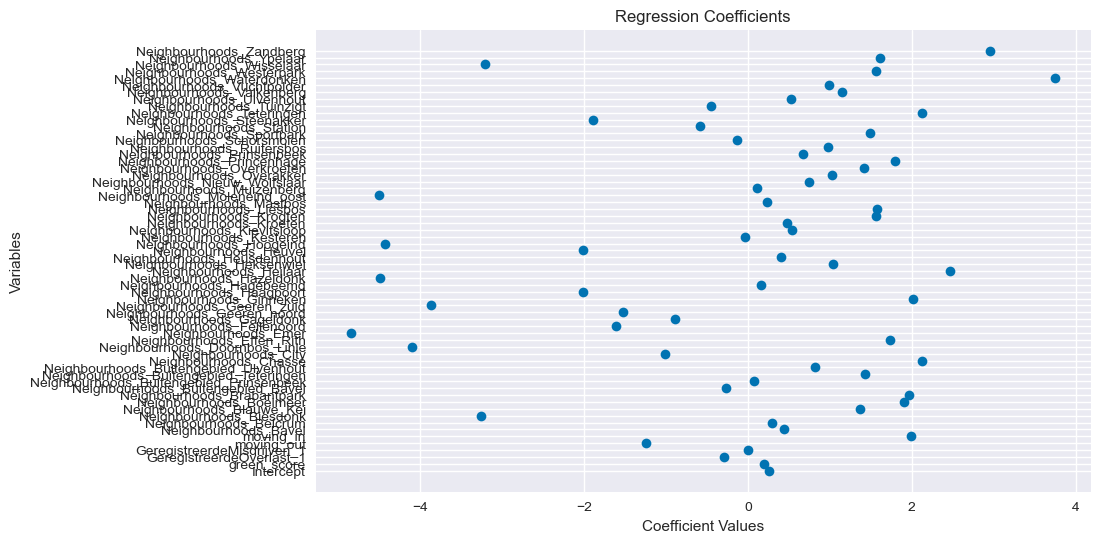

In [19]:
# Create a dot plot
plt.figure(figsize=(10, 6))
plt.plot(coefficients.values, coefficients.index, 'o')
plt.xlabel('Coefficient Values')
plt.ylabel('Variables')
plt.title('Regression Coefficients')
plt.grid(True)
plt.show()

**The coefficients were not propperly visualized in a dot plot, so I tried plooting them in a bar plot.**

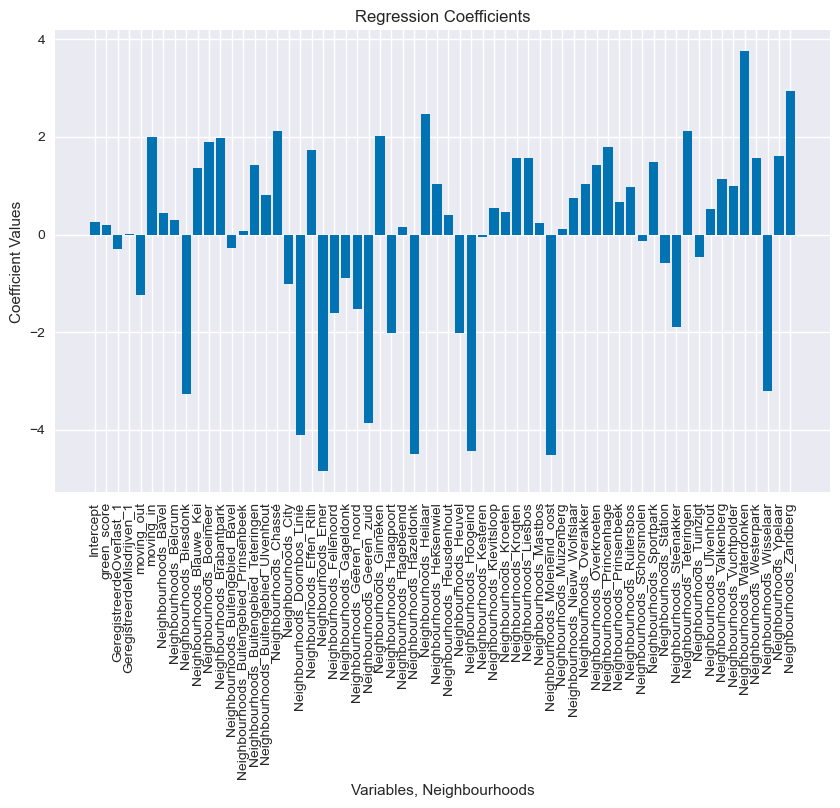

In [20]:
# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(coefficients.index, coefficients.values)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Variables, Neighbourhoods')
plt.ylabel('Coefficient Values')
plt.title('Regression Coefficients')
plt.show()

**The coefficients were propperly visualized in a bar plot, but I wanted to see if there was still  better ways to plot them. So I tried to plot the coefficients in a heatmap.**

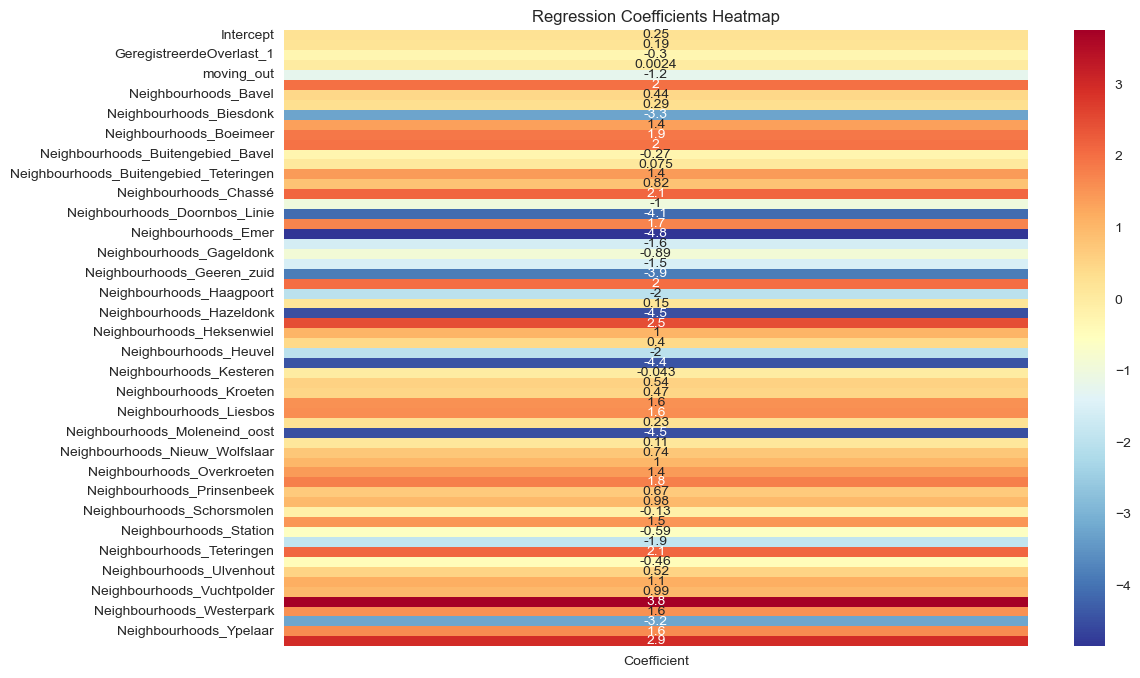

In [21]:
import seaborn as sns

# Create a DataFrame of coefficient values
coefficients = model_1.params
coef_df = coefficients.to_frame(name='Coefficient')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df, annot=True, cmap='RdYlBu_r')
plt.title('Regression Coefficients Heatmap')
plt.show()

**The heatmap looked good but the bar plot was stll the best way to viualize the coefficients, so I stuck with a bar plot but changed it to a horizontal barplot so that you could read the neighbourhoods propperly.**

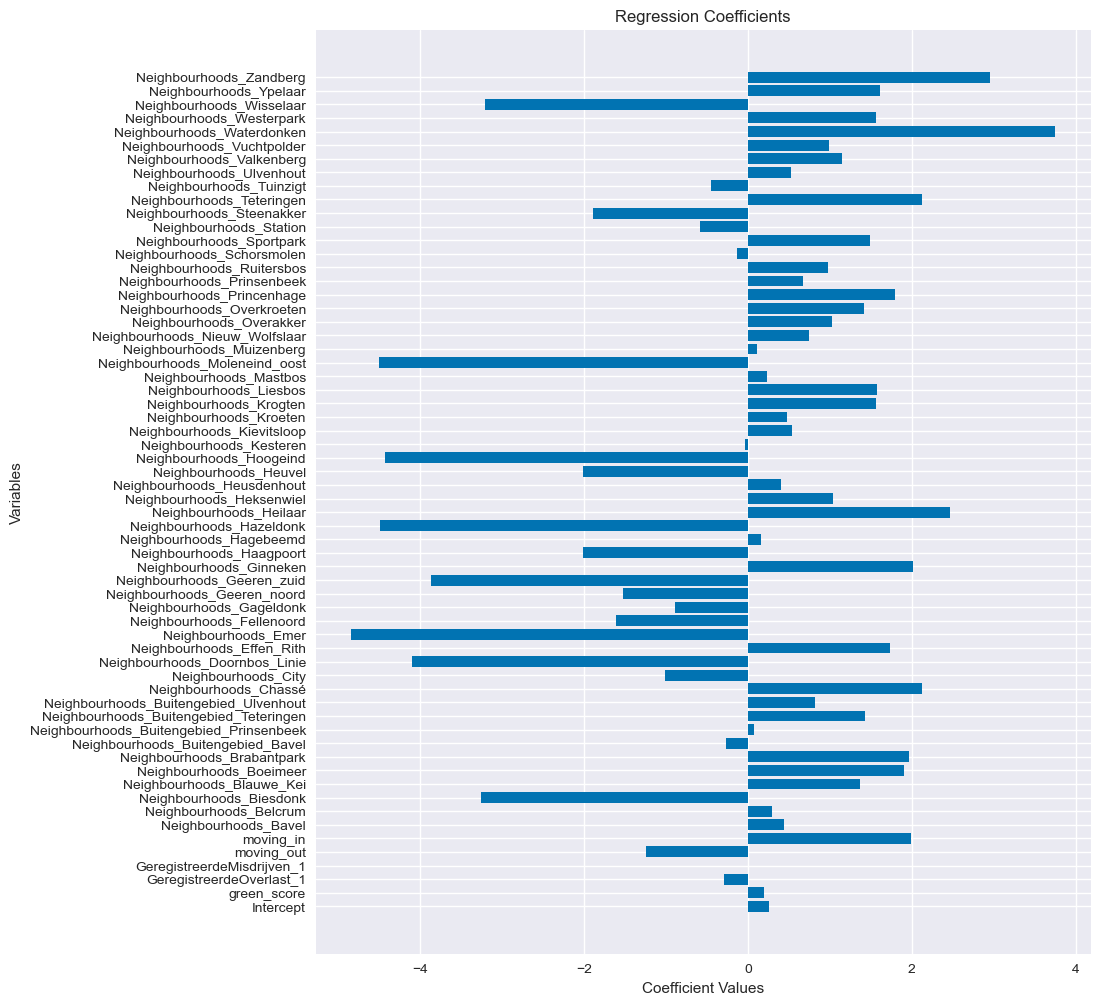

In [22]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
plt.barh(coefficients.index, coefficients.values)
plt.xlabel('Coefficient Values')
plt.ylabel('Variables')
plt.title('Regression Coefficients')
plt.grid(True)
plt.show()